#The 2st Assignment Pengolahan dan analisis Citra Digital
#Nama : Ihlasul Amal
#Nim : 24/551419/PPA/06974

#Import Library

In [ ]:
import os
import gdown
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
pip install gdown

#Data

In [ ]:
# 1. Input Citra 6x6 (Didefenisikan Secara Randon)
image_6x6 = np.array([
    [50, 50, 50, 200, 200, 200],
    [50, 50, 50, 200, 200, 200],
    [50, 50, 50, 200, 200, 200],
    [10, 10, 10, 250, 250, 250],
    [10, 10, 10, 250, 250, 250],
    [10, 10, 10, 250, 250, 250]
], dtype=np.float32)

print("Input Pixel Image:")
print(image_6x6)


Input Pixel Image:
[[ 50.  50.  50. 200. 200. 200.]
 [ 50.  50.  50. 200. 200. 200.]
 [ 50.  50.  50. 200. 200. 200.]
 [ 10.  10.  10. 250. 250. 250.]
 [ 10.  10.  10. 250. 250. 250.]
 [ 10.  10.  10. 250. 250. 250.]]


#Kernel Yang Digunakan

In [ ]:
# 3. Beberapa Kernel yang sering Digunakan
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16.0

laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)


# 1. Fungsi Konvolusi dari Nol

In [ ]:
# 2. Fungsi Konvolusi Manual (Sesuai Topik 04 - Filtering)
def convolve2d(image, kernel):
    # Flip kernel 180 derajat (sesuai definisi konvolusi)
    kernel = np.flipud(np.fliplr(kernel))
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Tambahkan padding nol
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    h, w = image.shape
    output = np.zeros((h, w), dtype=np.float32)

    # Geser kernel ke setiap posisi
    for i in range(h):
        for j in range(w):
            region = padded[i:i + k_h, j:j + k_w]
            output[i, j] = np.sum(region * kernel)

    return output

# Contoh penggunaan fungsi convolve2d dengan image_6x6 dan gaussian_kernel
result_6x6_gaussian = convolve2d(image_6x6, gaussian_kernel)

print("\nHasil Konvolusi image_6x6 dengan Gaussian Kernel:")
print(np.round(result_6x6_gaussian, 2))


Hasil Konvolusi image_6x6 dengan Gaussian Kernel:
[[ 28.12  37.5   65.62 121.88 150.   112.5 ]
 [ 37.5   50.    87.5  162.5  200.   150.  ]
 [ 30.    40.    83.12 169.38 212.5  159.38]
 [ 15.    20.    74.38 183.12 237.5  178.12]
 [  7.5   10.    70.   190.   250.   187.5 ]
 [  5.62   7.5   52.5  142.5  187.5  140.62]]


#Spatial Filtering

In [ ]:
# 4. Mencoba Melakukan Spatial Filtering
kernels = {
    "Gaussian (Smoothing)": gaussian_kernel,
    "Laplacian (Edge/Sharpen)": laplacian_kernel,
    "Sobel X (Horizontal Edge)": sobel_x,
    "Sharpen (Enhanced)": sharpen_kernel
}

print("Hasil sebelum dan setelah dilakukan Spasial filtering sebelum dan SPATIAL FILTERING: BEFORE vs AFTER")

for name, kernel in kernels.items():
    result = convolve2d(image_6x6, kernel)

    print(f"\n{'-'*60}")
    print(f"FILTER: {name}")

    print("\n[BEFORE] Original Image (6x6):")
    print(image_6x6.astype(int))

    print(f"\n[AFTER] {name}:")
    print(np.round(result, 2).astype(int))

Hasil sebelum dan setelah dilakukan Spasial filtering sebelum dan SPATIAL FILTERING: BEFORE vs AFTER

------------------------------------------------------------
FILTER: Gaussian (Smoothing)

[BEFORE] Original Image (6x6):
[[ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]]

[AFTER] Gaussian (Smoothing):
[[ 28  37  65 121 150 112]
 [ 37  50  87 162 200 150]
 [ 30  40  83 169 212 159]
 [ 15  20  74 183 237 178]
 [  7  10  70 190 250 187]
 [  5   7  52 142 187 140]]

------------------------------------------------------------
FILTER: Laplacian (Edge/Sharpen)

[BEFORE] Original Image (6x6):
[[ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]]

[AFTER] Laplacian (Edge/Sharpen):
[[ 100   50 -100  350  200  400]
 [  50    0 -150  150    0  200]
 [  90   40 -110  100  -50  

In [ ]:
# 5. Sharpening dengan Blurring (Unsharp Masking)
blurred = convolve2d(image_6x6, gaussian_kernel)
mask = image_6x6 - blurred
alpha = 1.5
sharpened = image_6x6 + alpha * mask
sharpened = np.clip(sharpened, 0, 255)  # Pastikan nilai valid [0,255]

print("SHARPENING VIA BLURRING (UNSHARP MASKING)")
print("Blurred Image:")
print(np.round(blurred, 2))


print("\nSharpened Image:")
print(np.round(sharpened, 2))

SHARPENING VIA BLURRING (UNSHARP MASKING)
Blurred Image:
[[ 28.12  37.5   65.62 121.88 150.   112.5 ]
 [ 37.5   50.    87.5  162.5  200.   150.  ]
 [ 30.    40.    83.12 169.38 212.5  159.38]
 [ 15.    20.    74.38 183.12 237.5  178.12]
 [  7.5   10.    70.   190.   250.   187.5 ]
 [  5.62   7.5   52.5  142.5  187.5  140.62]]

Sharpened Image:
[[ 82.81  68.75  26.56 255.   255.   255.  ]
 [ 68.75  50.     0.   255.   200.   255.  ]
 [ 80.    65.     0.31 245.94 181.25 255.  ]
 [  2.5    0.     0.   255.   255.   255.  ]
 [ 13.75  10.     0.   255.   250.   255.  ]
 [ 16.56  13.75   0.   255.   255.   255.  ]]


#Test beberapa kasus citra

In [ ]:
# 1. Input Citra (5 citra dengan kasus atau pixel yang berbeda)
# Citra 1: Noise
image_noise = np.array([
    [50, 50, 50, 200, 200, 200],
    [50, 50, 50, 200, 200, 200],
    [50, 50, 50, 200, 200, 200],
    [10, 10, 10, 250, 250, 250],
    [10, 10, 10, 250, 250, 250],
    [10, 10, 10, 250, 250, 250]
], dtype=np.float32)

# Citra 2: Kontras Rendah
image_low_contrast = np.array([
    [100, 100, 100, 120, 120, 120],
    [100, 100, 100, 120, 120, 120],
    [100, 100, 100, 120, 120, 120],
    [110, 110, 110, 130, 130, 130],
    [110, 110, 110, 130, 130, 130],
    [110, 110, 110, 130, 130, 130]
], dtype=np.float32)

# Citra 3: Tepi Jelas
image_sharp_edges = np.array([
    [255, 255, 255, 0, 0, 0],
    [255, 255, 255, 0, 0, 0],
    [255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255],
    [0, 0, 0, 255, 255, 255],
    [0, 0, 0, 255, 255, 255]
], dtype=np.float32)

# Citra 4: Tepi Lembut
image_soft_edges = np.array([
    [200, 200, 200, 50, 50, 50],
    [200, 200, 200, 50, 50, 50],
    [200, 200, 200, 50, 50, 50],
    [100, 100, 100, 150, 150, 150],
    [100, 100, 100, 150, 150, 150],
    [100, 100, 100, 150, 150, 150]
], dtype=np.float32)

# Citra 5: Citra Biasa
image_normal = np.array([
    [100, 100, 100, 150, 150, 150],
    [100, 100, 100, 150, 150, 150],
    [100, 100, 100, 150, 150, 150],
    [200, 200, 200, 50, 50, 50],
    [200, 200, 200, 50, 50, 50],
    [200, 200, 200, 50, 50, 50]
], dtype=np.float32)

images = {
    "Noise": image_noise,
    "Low Contrast": image_low_contrast,
    "Sharp Edges": image_sharp_edges,
    "Soft Edges": image_soft_edges,
    "Normal": image_normal
}

In [ ]:
# 2. Fungsi Konvolusi Manual
def convolve2d(image, kernel):
    # Flip kernel 180 derajat
    kernel = np.flipud(np.fliplr(kernel))
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Tambahkan padding nol di sekeliling citra
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    h, w = image.shape
    output = np.zeros((h, w), dtype=np.float32)

    # Geser kernel ke setiap posisi
    for i in range(h):
        for j in range(w):
            region = padded[i:i + k_h, j:j + k_w]
            output[i, j] = np.sum(region * kernel)

    return output

In [ ]:
# 4. Spatial Filtering: Tampilkan Before & After
for image_name, image in images.items():
    print("\n" + "="*70)
    print(f"IMAGE: {image_name}")
    print("="*70)

    for name, kernel in kernels.items():
        result = convolve2d(image, kernel)

        print(f"FILTER: {name}")

        print("\n[BEFORE] Original Image:")
        print(image.astype(int))

        print(f"\n[AFTER] {name}:")
        print(np.round(result, 2).astype(int))


IMAGE: Noise
FILTER: Gaussian (Smoothing)

[BEFORE] Original Image:
[[ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]]

[AFTER] Gaussian (Smoothing):
[[ 28  37  65 121 150 112]
 [ 37  50  87 162 200 150]
 [ 30  40  83 169 212 159]
 [ 15  20  74 183 237 178]
 [  7  10  70 190 250 187]
 [  5   7  52 142 187 140]]
FILTER: Laplacian (Edge/Sharpen)

[BEFORE] Original Image:
[[ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]
 [ 10  10  10 250 250 250]]

[AFTER] Laplacian (Edge/Sharpen):
[[ 100   50 -100  350  200  400]
 [  50    0 -150  150    0  200]
 [  90   40 -110  100  -50  150]
 [ -30  -40 -280  290   50  300]
 [  10    0 -240  240    0  250]
 [  20   10 -230  490  250  500]]
FILTER: Sobel X (Horizontal Edge)

[BEFORE] Original Image:
[[ 50  50  50 200 200 200]
 [ 50  50  50 200 200 200]
 [ 5

In [ ]:
# 5. Sharpening with Blurring (Unsharp Masking)

for image_name, image in images.items():
    print("\n" + "="*60)
    print(f"IMAGE: {image_name}")
    print("="*60)

    blurred = convolve2d(image, gaussian_kernel)
    mask = image - blurred
    alpha = 1.5
    sharpened = image + alpha * mask
    sharpened = np.clip(sharpened, 0, 255)

    print("Blurred Image:")
    print (np.round(blurred, 2))

    print("\nSharpened Image:")
    print(np.round(sharpened, 2))

    print()



IMAGE: Noise
Blurred Image:
[[ 28.12  37.5   65.62 121.88 150.   112.5 ]
 [ 37.5   50.    87.5  162.5  200.   150.  ]
 [ 30.    40.    83.12 169.38 212.5  159.38]
 [ 15.    20.    74.38 183.12 237.5  178.12]
 [  7.5   10.    70.   190.   250.   187.5 ]
 [  5.62   7.5   52.5  142.5  187.5  140.62]]

Sharpened Image:
[[ 82.81  68.75  26.56 255.   255.   255.  ]
 [ 68.75  50.     0.   255.   200.   255.  ]
 [ 80.    65.     0.31 245.94 181.25 255.  ]
 [  2.5    0.     0.   255.   255.   255.  ]
 [ 13.75  10.     0.   255.   250.   255.  ]
 [ 16.56  13.75   0.   255.   255.   255.  ]]


IMAGE: Low Contrast
Blurred Image:
[[ 56.25  75.    78.75  86.25  90.    67.5 ]
 [ 75.   100.   105.   115.   120.    90.  ]
 [ 76.88 102.5  107.5  117.5  122.5   91.88]
 [ 80.62 107.5  112.5  122.5  127.5   95.62]
 [ 82.5  110.   115.   125.   130.    97.5 ]
 [ 61.88  82.5   86.25  93.75  97.5   73.12]]

Sharpened Image:
[[165.62 137.5  131.88 170.62 165.   198.75]
 [137.5  100.    92.5  127.5  120.   165

#Test pada citra asli

In [ ]:
# 1. Mengunduh Gambar dari Google Drive
def download_images_from_drive(folder_id, destination_folder):
    # URL untuk mengunduh folder dari Google Drive
    url = f"https://drive.google.com/drive/folders/{folder_id}"
    # Mengunduh folder
    gdown.download_folder(url, output=destination_folder, quiet=True)

# ID folder Google Drive
folder_id = "16Le6lXQ_i7a9_ci0Cd1dK5ddq7yzGal7"
# Folder tujuan untuk menyimpan gambar
destination_folder = "images"

# Buat folder tujuan jika belum ada
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Mengunduh gambar
download_images_from_drive(folder_id, destination_folder)

MENAMPILKAN GAMBAR YANG DIUNDUH

Menampilkan: KontrasTerlaluGelap.jpg


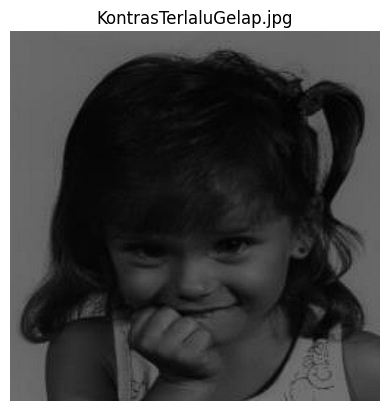


Menampilkan: motionBlur.jpg


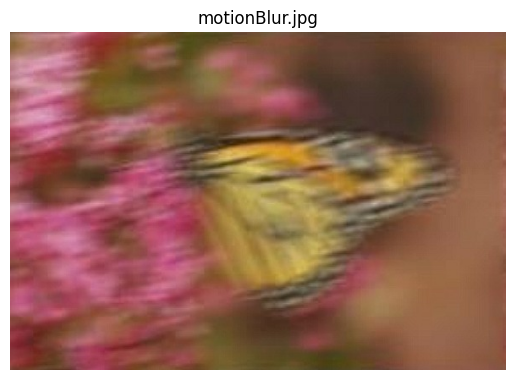


Menampilkan: noice.jpg


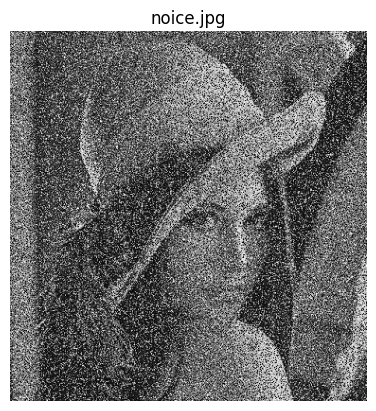

In [ ]:
# 3. Menampilkan Gambar yang Diunduh
image_files = [os.path.join(destination_folder, f) for f in os.listdir(destination_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
image_files.sort() # Urutkan berdasarkan nama file

print("MENAMPILKAN GAMBAR YANG DIUNDUH")

for image_path in image_files:
    try:
        # Buka gambar menggunakan PIL
        img = Image.open(image_path)
        # Konversi ke numpy array
        img_array = np.array(img)

        print(f"\nMenampilkan: {os.path.basename(image_path)}")

        # Tampilkan gambar
        plt.imshow(img_array, cmap='gray') # Asumsi gambar grayscale, sesuaikan jika RGB
        plt.title(os.path.basename(image_path))
        plt.axis('off') # Matikan sumbu
        plt.show()

    except Exception as e:
        print(f"Gagal menampilkan {os.path.basename(image_path)}: {e}")

In [ ]:
# 2. Load Gambar dari Folder Lokal
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    return np.array(image, dtype=np.float32)

# Path to the folder containing the images
image_folder = 'images'
image_files = os.listdir(image_folder)

# Load images
images = {}
for file in image_files:
    image_name = os.path.splitext(file)[0]
    image_path = os.path.join(image_folder, file)
    images[image_name] = load_image(image_path)


In [ ]:
# 4. Definisi Kernel (Sesuai Materi Topik 04)
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16.0

laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=np.float32)

kernels = {
    "Gaussian (Smoothing)": gaussian_kernel,
    "Laplacian (Edge/Sharpen)": laplacian_kernel,
    "Sobel X (Horizontal Edge)": sobel_x,
    "Sharpen (Enhanced)": sharpen_kernel
}

In [ ]:
# 3. Fungsi Konvolusi (Dilakukan secara manual)
def convolve2d(image, kernel):
    # Flip kernel 180 derajat (sesuai definisi konvolusi)
    kernel = np.flipud(np.fliplr(kernel))
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Tambahkan padding nol di sekeliling citra
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    h, w = image.shape
    output = np.zeros((h, w), dtype=np.float32)

    # Geser kernel ke setiap posisi
    for i in range(h):
        for j in range(w):
            region = padded[i:i + k_h, j:j + k_w]
            output[i, j] = np.sum(region * kernel)

    return output


IMAGE: KontrasTerlaluGelap
FILTER: Gaussian (Smoothing)

[BEFORE] Original Image:
[[106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 ...
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]]

[AFTER] Gaussian (Smoothing):
[[ 59  80  80 ...  78  78  59]
 [ 79 106 106 ... 105 105  78]
 [ 79 106 106 ... 105 105  78]
 ...
 [ 81 108 108 ...  61  61  46]
 [ 81 108 108 ...  61  61  46]
 [ 60  81  81 ...  46  46  34]]


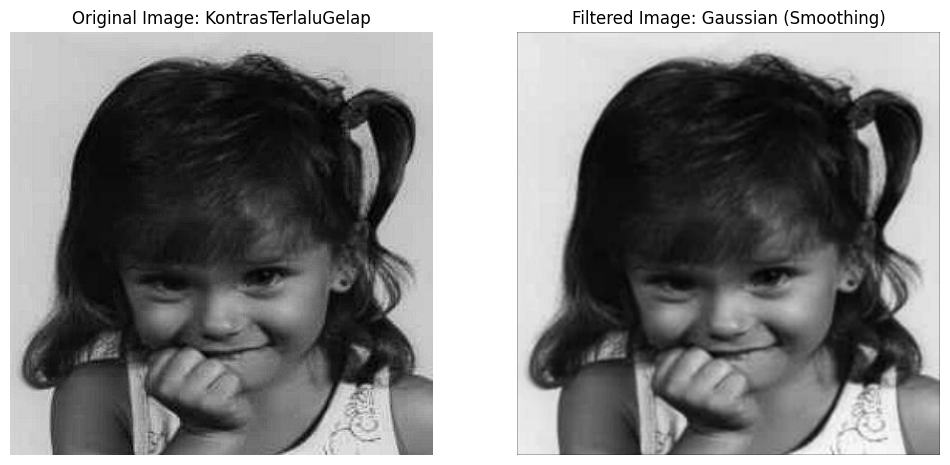

FILTER: Laplacian (Edge/Sharpen)

[BEFORE] Original Image:
[[106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 ...
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]]

[AFTER] Laplacian (Edge/Sharpen):
[[211 108 108 ... 105 105 210]
 [105   1   1 ...   0   0 105]
 [105   1   1 ...   0   0 105]
 ...
 [107  -1   0 ...   3   1  59]
 [108   0   0 ...   2   1  60]
 [216 108 108 ...  64  63 121]]


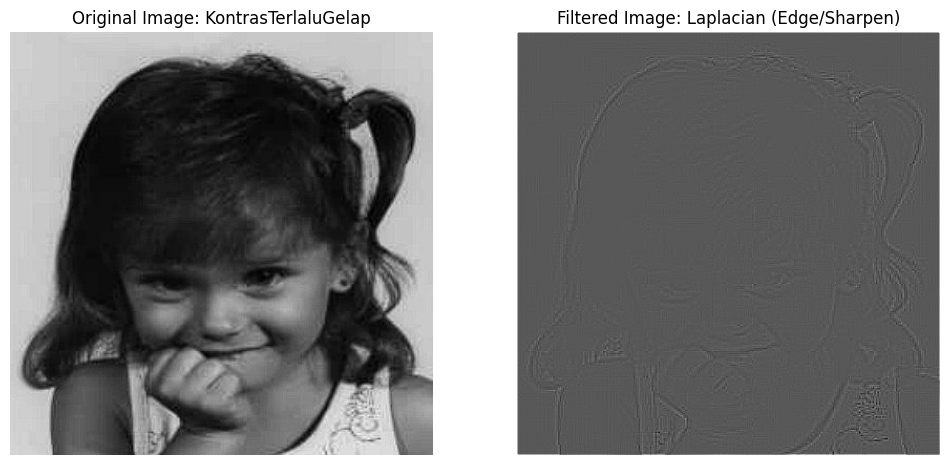

FILTER: Sobel X (Horizontal Edge)

[BEFORE] Original Image:
[[106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 ...
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]]

[AFTER] Sobel X (Horizontal Edge):
[[-321   -3    3 ...    0    0  315]
 [-428   -4    4 ...    0    0  420]
 [-428   -4    4 ...    0    0  420]
 ...
 [-433    1    1 ...   -6    2  248]
 [-432    0    0 ...   -8    4  248]
 [-324    0    0 ...   -6    3  186]]


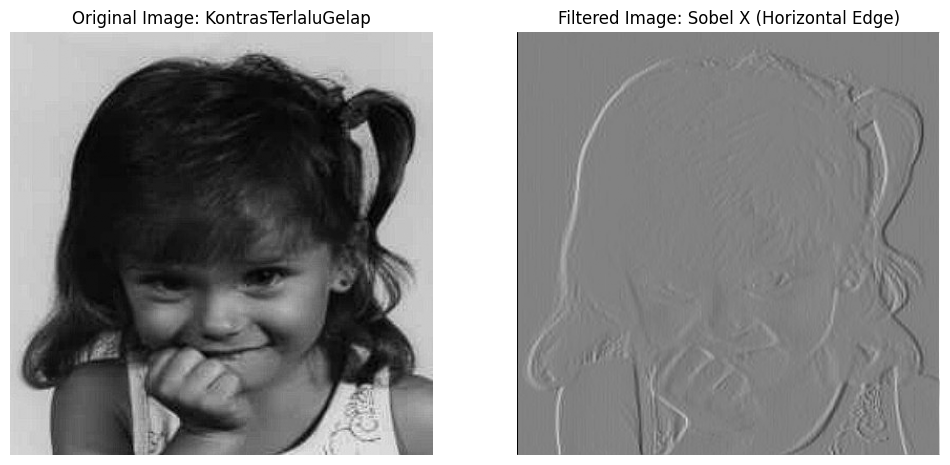

FILTER: Sharpen (Enhanced)

[BEFORE] Original Image:
[[106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 [106 107 107 ... 105 105 105]
 ...
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]
 [108 108 108 ...  62  62  61]]

[AFTER] Sharpen (Enhanced):
[[317 215 215 ... 210 210 315]
 [211 108 108 ... 105 105 210]
 [211 108 108 ... 105 105 210]
 ...
 [215 107 108 ...  65  63 120]
 [216 108 108 ...  64  63 121]
 [324 216 216 ... 126 125 182]]


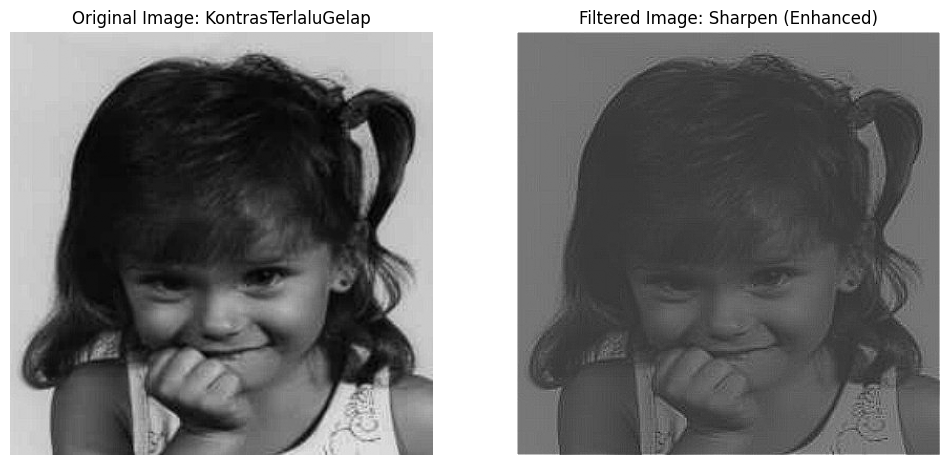

IMAGE: motionBlur
FILTER: Gaussian (Smoothing)

[BEFORE] Original Image:
[[ 92  94  97 ...  98  97  97]
 [105 107 110 ...  97  96  96]
 [109 112 115 ...  98  98  98]
 ...
 [ 87  84  81 ... 100  98  98]
 [ 85  83  80 ... 100  98  98]
 [ 84  82  79 ... 100  98  98]]

[AFTER] Gaussian (Smoothing):
[[ 54  73  75 ...  73  72  54]
 [ 77 105 107 ...  97  96  72]
 [ 82 112 114 ...  98  97  73]
 ...
 [ 64  84  80 ...  99  98  73]
 [ 63  82  79 ...  99  98  73]
 [ 47  61  59 ...  74  73  55]]


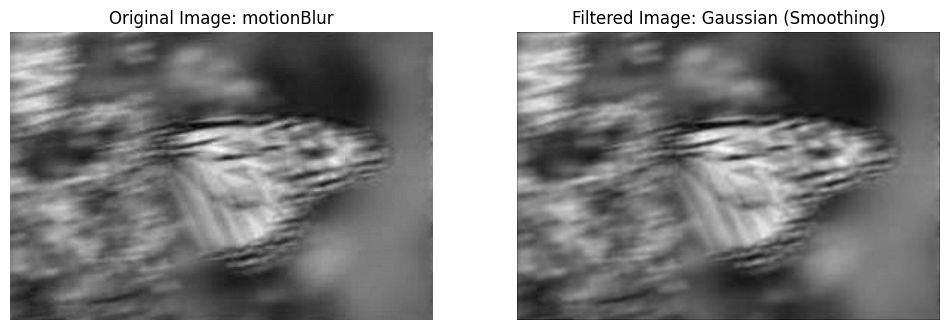

FILTER: Laplacian (Edge/Sharpen)

[BEFORE] Original Image:
[[ 92  94  97 ...  98  97  97]
 [105 107 110 ...  97  96  96]
 [109 112 115 ...  98  98  98]
 ...
 [ 87  84  81 ... 100  98  98]
 [ 85  83  80 ... 100  98  98]
 [ 84  82  79 ... 100  98  98]]

[AFTER] Laplacian (Edge/Sharpen):
[[169  80  85 ... 100  97 195]
 [112   7   9 ...  -2  -4  93]
 [104   0   1 ...   0   1  99]
 ...
 [ 90  -1   1 ...   3  -3  97]
 [ 86   1   0 ...   4  -2  98]
 [169  82  78 ... 103  96 196]]


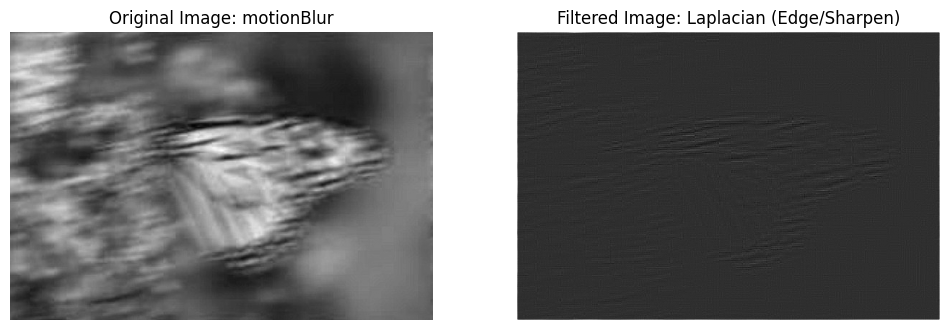

FILTER: Sobel X (Horizontal Edge)

[BEFORE] Original Image:
[[ 92  94  97 ...  98  97  97]
 [105 107 110 ...  97  96  96]
 [109 112 115 ...  98  98  98]
 ...
 [ 87  84  81 ... 100  98  98]
 [ 85  83  80 ... 100  98  98]
 [ 84  82  79 ... 100  98  98]]

[AFTER] Sobel X (Horizontal Edge):
[[-295  -15  -15 ...    4    3  290]
 [-420  -21  -20 ...    6    3  387]
 [-448  -22  -20 ...    4    0  391]
 ...
 [-337   24   27 ...    2    7  393]
 [-332   21   25 ...    2    8  392]
 [-247   15   18 ...    2    6  294]]


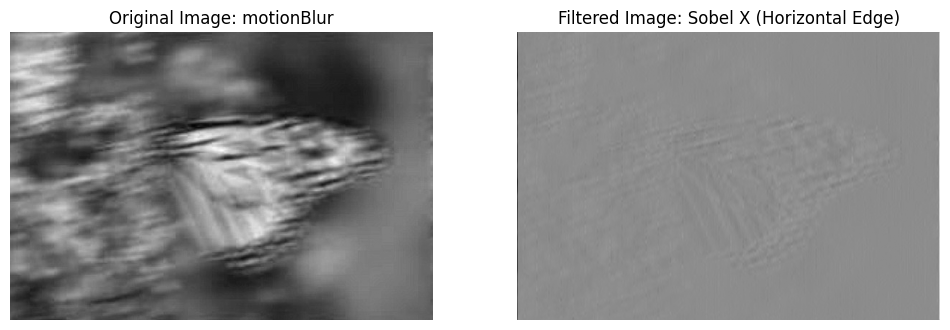

FILTER: Sharpen (Enhanced)

[BEFORE] Original Image:
[[ 92  94  97 ...  98  97  97]
 [105 107 110 ...  97  96  96]
 [109 112 115 ...  98  98  98]
 ...
 [ 87  84  81 ... 100  98  98]
 [ 85  83  80 ... 100  98  98]
 [ 84  82  79 ... 100  98  98]]

[AFTER] Sharpen (Enhanced):
[[261 174 182 ... 198 194 292]
 [217 114 119 ...  95  92 189]
 [213 112 116 ...  98  99 197]
 ...
 [177  83  82 ... 103  95 195]
 [171  84  80 ... 104  96 196]
 [253 164 157 ... 203 194 294]]


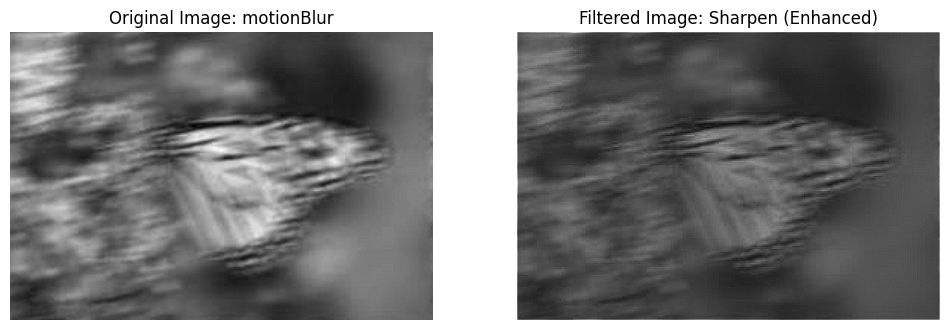

IMAGE: noice
FILTER: Gaussian (Smoothing)

[BEFORE] Original Image:
[[111 105 107 ... 156  27  64]
 [ 53 255 145 ...  81  60 214]
 [126  75 254 ... 197  86  70]
 ...
 [ 52  66  36 ...  25   0 210]
 [ 56  76  66 ... 106  97 115]
 [ 50   3 182 ...  78  80   0]]

[AFTER] Gaussian (Smoothing):
[[ 63  97  83 ...  68  60  49]
 [ 86 148 155 ...  85  96  84]
 [ 87 140 176 ...  99 101  71]
 ...
 [ 40  53  61 ...  72  89  89]
 [ 40  62  78 ...  77  81  72]
 [ 24  46  79 ...  74  55  30]]


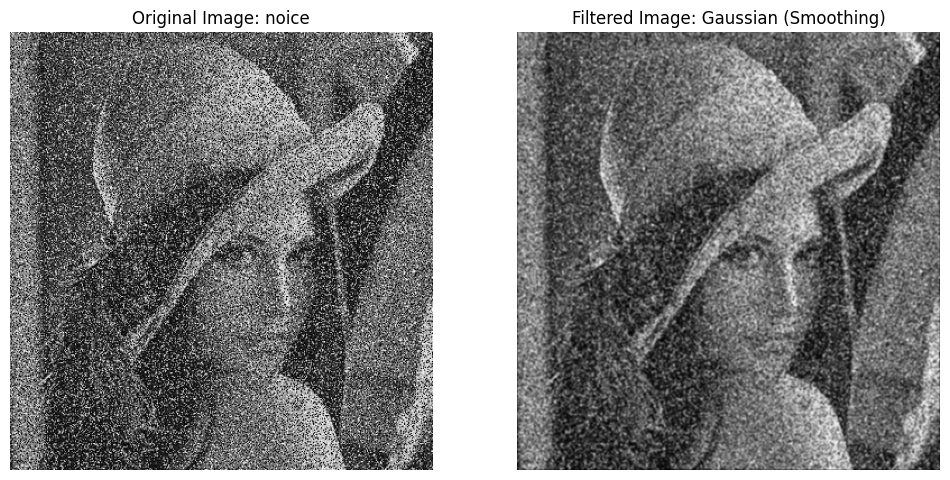

FILTER: Laplacian (Edge/Sharpen)

[BEFORE] Original Image:
[[111 105 107 ... 156  27  64]
 [ 53 255 145 ...  81  60 214]
 [126  75 254 ... 197  86  70]
 ...
 [ 52  66  36 ...  25   0 210]
 [ 56  76  66 ... 106  97 115]
 [ 50   3 182 ...  78  80   0]]

[AFTER] Laplacian (Edge/Sharpen):
[[ 286  -53  176 ...  416 -172   15]
 [-280  642 -191 ...  -89 -168  662]
 [ 237 -442  480 ...  455  -29  -99]
 ...
 [  25   99 -170 ... -264 -462  661]
 [  46  113  -78 ...  169   87  153]
 [ 141 -296  518 ...  -52  145 -195]]


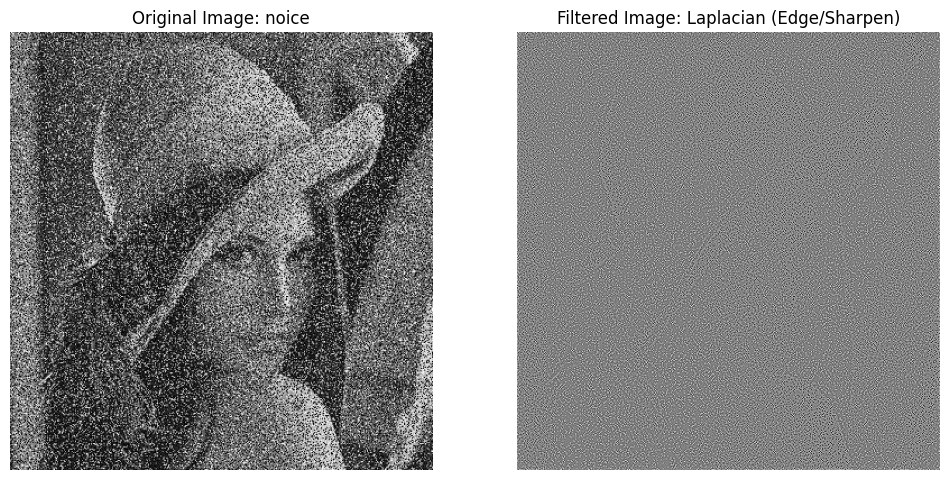

FILTER: Sobel X (Horizontal Edge)

[BEFORE] Original Image:
[[111 105 107 ... 156  27  64]
 [ 53 255 145 ...  81  60 214]
 [126  75 254 ... 197  86  70]
 ...
 [ 52  66  36 ...  25   0 210]
 [ 56  76  66 ... 106  97 115]
 [ 50   3 182 ...  78  80   0]]

[AFTER] Sobel X (Horizontal Edge):
[[-465  -84  306 ...   86   51  114]
 [-690 -308  192 ... -129  -47  233]
 [-512 -339 -234 ... -242  204  278]
 ...
 [-209    4 -129 ...  -38 -227  227]
 [-221 -136 -119 ...   56 -125  274]
 [ -82 -274 -248 ...  154  147  257]]


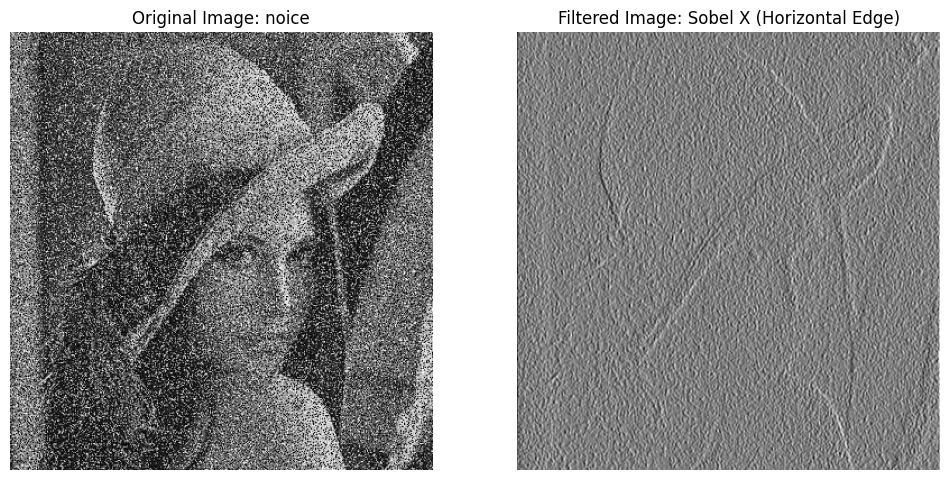

FILTER: Sharpen (Enhanced)

[BEFORE] Original Image:
[[111 105 107 ... 156  27  64]
 [ 53 255 145 ...  81  60 214]
 [126  75 254 ... 197  86  70]
 ...
 [ 52  66  36 ...  25   0 210]
 [ 56  76  66 ... 106  97 115]
 [ 50   3 182 ...  78  80   0]]

[AFTER] Sharpen (Enhanced):
[[ 397   52  283 ...  572 -145   79]
 [-227  897  -46 ...   -8 -108  876]
 [ 363 -367  734 ...  652   57  -29]
 ...
 [  77  165 -134 ... -239 -462  871]
 [ 102  189  -12 ...  275  184  268]
 [ 191 -293  700 ...   26  225 -195]]


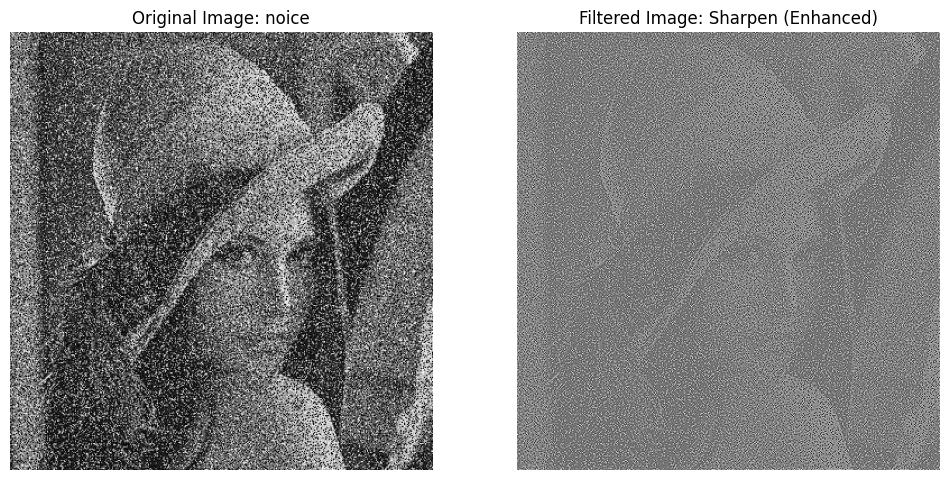

In [ ]:
# 5. Spatial Filtering
for image_name, image in images.items():

    print("="*50)
    print(f"IMAGE: {image_name}")
    print("="*50)

    for name, kernel in kernels.items():
        result = convolve2d(image, kernel)

        print(f"FILTER: {name}")

        print("\n[BEFORE] Original Image:")
        print(image.astype(int))

        print(f"\n[AFTER] {name}:")
        print(np.round(result, 2).astype(int))

        # Visualize the results
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title(f"Original Image: {image_name}")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Filtered Image: {name}")
        plt.imshow(result, cmap='gray')
        plt.axis('off')

        plt.show()


IMAGE: KontrasTerlaluGelap
Blurred Image:
[[ 59.81  80.06  80.06 ...  78.75  78.75  59.06]
 [ 79.75 106.75 106.75 ... 105.   105.    78.75]
 [ 79.75 106.75 106.75 ... 105.   105.    78.75]
 ...
 [ 81.19 108.19 108.06 ...  61.5   61.75  46.12]
 [ 81.   108.   108.   ...  61.5   61.75  46.  ]
 [ 60.75  81.    81.   ...  46.12  46.31  34.5 ]]

Sharpened Image:
[[175.28 147.41 147.41 ... 144.38 144.38 173.91]
 [145.38 107.38 107.38 ... 105.   105.   144.38]
 [145.38 107.38 107.38 ... 105.   105.   144.38]
 ...
 [148.22 107.72 107.91 ...  62.75  62.38  83.31]
 [148.5  108.   108.   ...  62.75  62.38  83.5 ]
 [178.88 148.5  148.5  ...  85.81  85.53 100.75]]


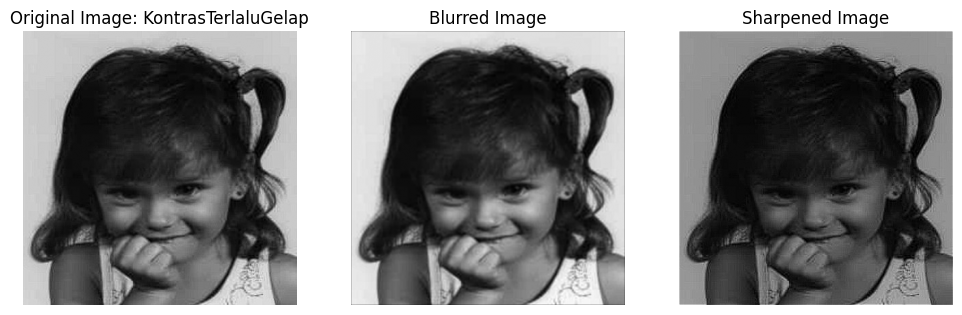


IMAGE: motionBlur
Blurred Image:
[[ 54.56  73.94  75.81 ...  73.12  72.69  54.38]
 [ 77.62 105.19 107.75 ...  97.5   96.94  72.56]
 [ 82.75 112.12 114.75 ...  98.    97.75  73.31]
 ...
 [ 64.56  84.12  80.94 ...  99.25  98.69  73.69]
 [ 63.38  82.81  79.94 ...  99.12  98.5   73.5 ]
 [ 47.06  61.56  59.5  ...  74.38  73.88  55.12]]

Sharpened Image:
[[148.16 124.09 128.78 ... 135.31 133.47 160.94]
 [146.06 109.72 113.38 ...  96.25  94.59 131.16]
 [148.38 111.81 115.38 ...  98.    98.38 135.03]
 ...
 [120.66  83.81  81.09 ... 101.12  96.97 134.47]
 [117.44  83.28  80.09 ... 101.31  97.25 134.75]
 [139.41 112.66 108.25 ... 138.44 134.19 162.31]]


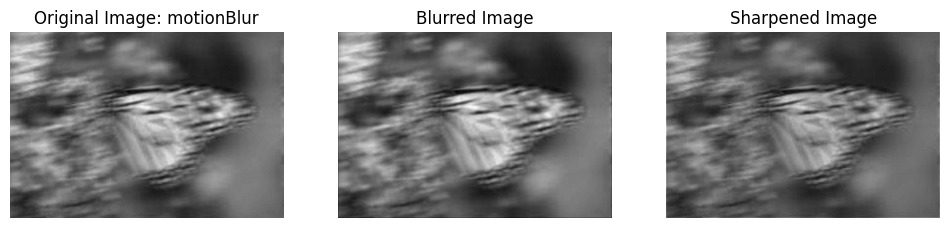


IMAGE: noice
Blurred Image:
[[ 63.44  97.75  83.88 ...  68.75  60.19  49.88]
 [ 86.   148.38 155.62 ...  85.44  96.44  84.81]
 [ 87.5  140.69 176.5  ...  99.25 101.62  71.5 ]
 ...
 [ 40.69  53.5   61.31 ...  72.5   89.06  89.06]
 [ 40.56  62.88  78.81 ...  77.12  81.44  72.12]
 [ 24.62  46.88  79.5  ...  74.5   55.69  30.44]]

Sharpened Image:
[[182.34 115.88 141.69 ... 255.     0.    85.19]
 [  3.5  255.   129.06 ...  74.34   5.34 255.  ]
 [183.75   0.   255.   ... 255.    62.56  67.75]
 ...
 [ 68.97  84.75   0.   ...   0.     0.   255.  ]
 [ 79.16  95.69  46.78 ... 149.31 120.34 179.31]
 [ 88.06   0.   255.   ...  83.25 116.47   0.  ]]


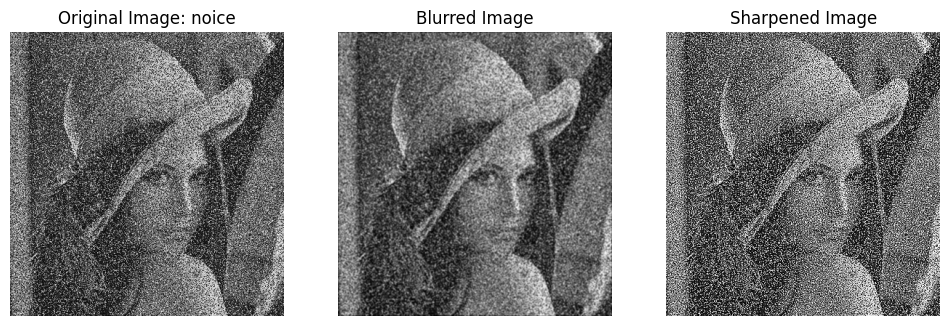

In [ ]:
# 6. Sharpening with Blurring (Unsharp Masking)
for image_name, image in images.items():
    print("\n" + "="*60)
    print(f"IMAGE: {image_name}")
    print("="*60)

    blurred = convolve2d(image, gaussian_kernel)
    mask = image - blurred
    alpha = 1.5
    sharpened = image + alpha * mask
    sharpened = np.clip(sharpened, 0, 255)  # Pastikan nilai valid [0,255]

    print("Blurred Image:")
    print(np.round(blurred, 2))

    print("\nSharpened Image:")
    print(np.round(sharpened, 2))

    # Visualize the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title(f"Original Image: {image_name}")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Blurred Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Sharpened Image")
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')

    plt.show()

#**Hasil Analisis**

Pada pengujian yang dilakukan pada 3 citra dengan permasalahan berbeda yaitu:
1. Citra dengan noice
2. citra dengan kontras rendah
3. Citra dengan permasalahan blur

ketiga citra ini dilakukan percobaan dengan menggunakan berbagai kernel atau metode percobaan dan ditemukan hasil seperti berikut.

**1. Citra dengan Masalah: Noise**

A. Proses: Smoothing (Gaussian Blur)

Kelebihan
  Sangat Efektif Mengurangi Noise: Ini adalah keunggulan utamanya. Dengan merata-ratakan nilai piksel tetangga, filter blur secara efektif "meleburkan" bintik-bintik noise yang kontras dengan sekitarnya, membuat gambar terlihat jauh lebih bersih dan mulus.

Kekurangan:
  Kehilangan Ketajaman (Blurring): Sebagai konsekuensi, detail penting dan tepi objek yang asli pada gambar ikut menjadi kabur. Semakin kuat efek blur untuk menghilangkan noise, semakin banyak detail yang hilang, membuat gambar menjadi tidak tajam.

B. Proses: Sharpening (Penajaman)

Kelebihan:
  Hampir Tidak Ada: Dalam kasus citra yang sangat bernoise, hampir tidak ada keuntungan menerapkan filter penajaman secara langsung.

Kekurangan:
  Memperparah Noise Secara Drastis: Ini adalah kelemahan fatal. Filter penajaman bekerja dengan menonjolkan perbedaan nilai piksel. Karena noise adalah perbedaan piksel yang sangat kontras, filter ini akan mengamplifikasi noise secara signifikan, membuat bintik-bintik menjadi jauh lebih tajam, kasar, dan mengganggu daripada sebelumnya. Hasilnya, gambar akan terlihat jauh lebih buruk.

**2. Citra dengan Masalah: Kontras Rendah (Low Contrast)**

Citra ini terlihat datar, pucat, dan "berkabut". Perbedaan antara area gelap dan terang sangat tipis, sehingga detail sulit terlihat.
A. Proses: Smoothing (Gaussian Blur)

Kelebihan:
  Tidak Ada Keuntungan Signifikan: Tidak ada manfaat nyata dari menerapkan blur pada gambar yang sudah datar. Mungkin hanya akan menghaluskan noise yang sangat minor jika ada.

Kekurangan:
  Proses blur akan semakin mengurangi perbedaan tipis antar piksel, membuat gambar yang sudah berkontras rendah menjadi semakin kabur dan tidak jelas.

B. Proses: Sharpening (Penajaman)

Kelebihan:
 Filter ini akan mempertegas tepi-tepi halus yang sebelumnya tidak terlihat jelas. Ini secara efektif meningkatkan kontras lokal (kontras di sekitar tepi objek), membuat detail gambar "keluar" dan gambar terlihat lebih hidup dan jelas.

Kekurangan:
  Tidak Memperbaiki Kontras Global sehingga Penajaman hanya bekerja di area tepi. Ia tidak akan memperbaiki rentang tonal gambar secara keseluruhan (membuat area gelap menjadi lebih gelap dan area terang menjadi lebih terang). Untuk itu, diperlukan teknik lain seperti Histogram Equalization.
  selian itu Potensi Memunculkan Noise dimana ketika gambar berkontras rendah juga memiliki noise tersembunyi, penajaman akan memunculkan noise tersebut.

**3. Citra dengan Masalah: Kabur (Blur)**

Citra ini tidak fokus atau mengalami sedikit goyangan saat pengambilan gambar, membuat semua tepian objek terlihat lembut dan tidak tajam.

A. Proses: Smoothing (Gaussian Blur)

Kelebihan:
Tidak Ada Sama Sekali: Menerapkan blur pada gambar yang sudah blur tidak memiliki tujuan praktis dan hanya akan merusak gambar lebih jauh.

Kekurangan:
Memperparah Tingkat Blur: Ini adalah tindakan kontra-produktif. Gambar akan kehilangan sisa-sisa detail yang mungkin masih ada, menghasilkan gambar yang sama sekali tidak dapat digunakan.

B. Proses: Sharpening (Penajaman)

Kelebihan:
Mengembalikan Sebagian Ketajaman: Ini adalah fungsi utama dari filter penajaman. Dengan memperkuat tepi yang lembut, filter ini dapat secara signifikan mengurangi efek kabur, membuat gambar terlihat lebih fokus dan detailnya lebih mudah dikenali. Teknik Unsharp Masking sangat ideal untuk kasus ini.

Kekurangan:
Tidak Bisa Menciptakan Detail yang Hilang: Penajaman hanya bisa mempertegas apa yang sudah ada. Jika blur-nya terlalu parah sehingga detail benar-benar hilang.
  Jika diterapkan terlalu kuat, akan muncul garis-garis terang/gelap yang tidak alami di sekitar tepi objek, yang dikenal sebagai halo artifact, membuat gambar terlihat palsu.